# 2.01 - Modelling COB Peaks Timeseries
Using the peaks to assess the distribution of the data is a helpful approach to understand the distribution of meal intake over time. It has made it easier to assess the correctness of the data mapping to a daily pattern, especially given the issues with datetimes not aligning to the timezones that they are in. We'll now use the peaks to identify the COB values we are interested in modelling. The aim is to be able to assess what a standard day looks like and whether it is possible to idenfity where days are not standard, which may be due to errors in the data or due to the individual having a different pattern of meal intake. The peaks will be used to identify the COB values that are relevant for modelling, and then the timeseries will be used to assess the distribution and amplitude of those values over time. We will use the 15-minute resampled data here and focus on one of the candidates with the most defined distributions that shows a 3-meal intake clearly.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from loguru import logger
import matplotlib.pyplot as plt
import seaborn as sns

from src.cob_analysis import Cob
from src.data_processing.read import read_profile_offsets_csv
from src.configurations import Configuration
from src.time_series_analysis import run_adf, p_q_result, ts_dist_plot, ts_plot, split_ts, ts_plot_cfs

2025-05-26 21:36:58.382 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: C:\Users\ross\OneDrive\Documents\Masters\Project\masters_project


In [40]:
logger.remove()

candidates = [13029224, 21946407, 27700103, 32407882, 41131654, 42360672, 67208817, 74175219, 79526193, 86025410, 95851255, 96254963, 96805916, 97417885]
individual = 41131654
args = {'height': 15, 'distance': 5, 'suppress': False}
config = Configuration()

profile_offsets = read_profile_offsets_csv(config)

cob = Cob()
cob.read_interim_data(file_name='15min_iob_cob_bg', sampling_rate=15)
df_all = cob.process_one_tz_individuals(profile_offsets, args)

Number of records: 786757
Number of people: 133
Systems used: 	['OpenAPS']
Categories (1, object): ['OpenAPS']
From 120 IDs requested processing, ignored 22 individuals not found in dataset, leaving 98 processed records.
The following stats are based on parameters h=15 and d=5:
	Number of records: 2637045
	Number of days with peaks: 7923
	Number of peaks: 19539


The data has a 'cob max' column that we need to transform such that it only holds the values that are relevant for modelling. The peaks will be used to identify the COB values that are used for features. That removes any noise from other values. Note, the imputed values are not used and would be irrelevant anyway, given that we are focussing purely on the values that are peaks only. These would alway be original values.

In [41]:
df = df_all.loc[individual].copy()
# df2 = df.asfreq('15min')

In [24]:
# Running a quick ADF test to check if the data is stationary
run_adf(df['cob max'])

MissingDataError: exog contains inf or nans

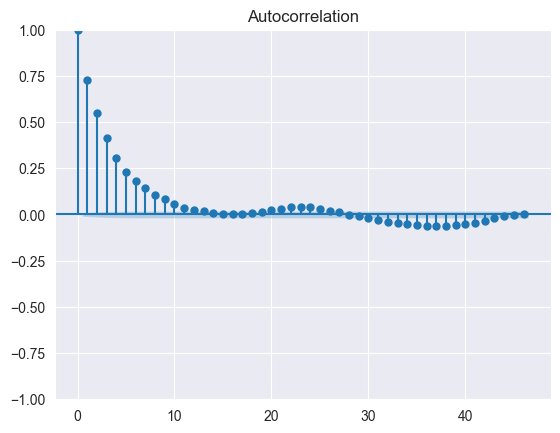

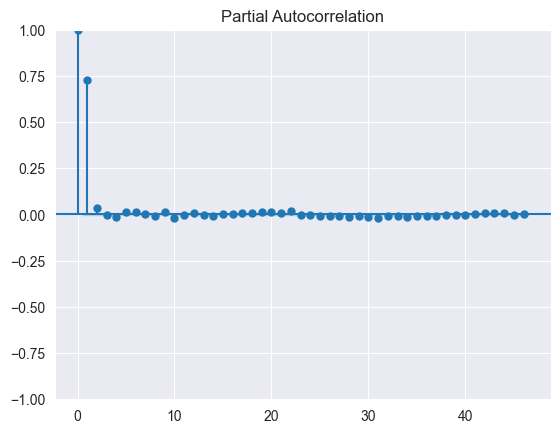

In [9]:
ts_plot_cfs(df['cob max'])

C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
<string>:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.

Trained ARIMA (0, 0, 0) in 2.09 seconds.
0 null values in predictions
Trained ARIMA (0, 0, 2) in 2.24 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 4) in 5.15 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 6) in 7.47 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (0, 0, 8) in 9.84 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (2, 0, 0) in 0.48 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (2, 0, 2) in 2.58 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (2, 0, 4) in 14.3 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (2, 0, 6) in 8.54 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (2, 0, 8) in 30.48 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (4, 0, 0) in 0.84 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parame

Trained ARIMA (4, 0, 2) in 22.52 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (4, 0, 4) in 21.68 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (4, 0, 6) in 39.39 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (4, 0, 8) in 31.84 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (6, 0, 0) in 1.94 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parame

Trained ARIMA (6, 0, 2) in 19.17 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parame

Trained ARIMA (6, 0, 4) in 35.33 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (6, 0, 6) in 44.43 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (6, 0, 8) in 78.07 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 0) in 3.5 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parame

Trained ARIMA (8, 0, 2) in 43.52 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parame

Trained ARIMA (8, 0, 4) in 38.97 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (8, 0, 6) in 41.86 seconds.
0 null values in predictions


C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\.env\master_project\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA (8, 0, 8) in 59.44 seconds.
0 null values in predictions
All permutations completed in 565.72 seconds.
        2       4       6       8
0  4.4993  4.4998  4.4977  4.4979
1  4.4990  4.4989  4.4978  4.4981
2  4.4972  4.4979  4.4981  4.4956
3  4.4973  4.4970  4.4971  4.4971
4  4.4970  4.4973  4.4964  4.5052


(          2         4         6         8
 0  4.499292  4.499784  4.497694  4.497877
 1  4.499035  4.498891  4.497755  4.498051
 2  4.497184  4.497900  4.498068  4.495632
 3  4.497310  4.496991  4.497138  4.497087
 4  4.496988  4.497266  4.496431  4.505166,
         Order            AIC            BIC
 0   (0, 0, 0)  304359.730474  304376.736056
 1   (0, 0, 2)  280976.164118  281010.175282
 2   (0, 0, 4)  277325.044276  277376.061022
 3   (0, 0, 6)  276687.764843  276755.787171
 4   (0, 0, 8)  276469.140691  276554.168601
 5   (2, 0, 0)  276342.956237  276376.967401
 6   (2, 0, 2)  276347.506854  276398.523599
 7   (2, 0, 4)  276333.419426  276401.441754
 8   (2, 0, 6)  276333.534790  276418.562700
 9   (2, 0, 8)  276326.622101  276428.655593
 10  (4, 0, 0)  276342.405361  276393.422107
 11  (4, 0, 2)  276328.889437  276396.911765
 12  (4, 0, 4)  276335.119529  276420.147438
 13  (4, 0, 6)  276324.611193  276426.644685
 14  (4, 0, 8)  276326.087758  276445.126832
 15  (6, 0, 0)  27633

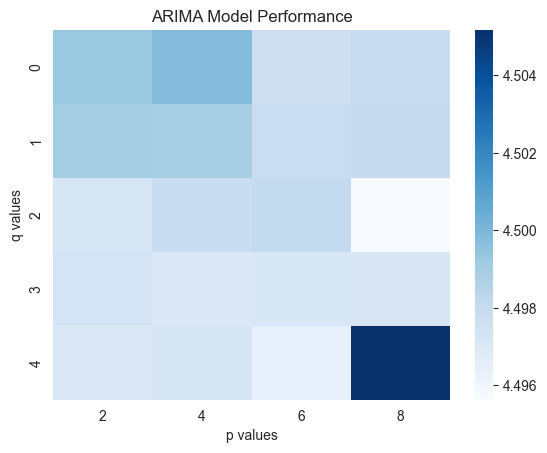

In [42]:
p_q_args = {'pmax': 10, 'qmax': 10, 'pstep': 2, 'qstep': 2}
p_q_result(**p_q_args, ytrain=df['cob max'])


In [14]:
# After
df = df.asfreq('15min')
df['cob max'] = df['cob max'].fillna(0)